In [1]:
import os
from pathlib import Path

iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
if iskaggle: path = Path('../input/titanic')
else:
    path = Path('Data/titanic')
    if not path.exists():
        import zipfile,kaggle
        kaggle.api.competition_download_cli(str(path))
        zipfile.ZipFile(f'{path}.zip').extractall(path)

In [2]:
import torch, numpy as np, pandas as pd
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

In [3]:
df = pd.read_csv(path/'train.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
modes = df.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [7]:
df.fillna(modes, inplace=True)

In [8]:
df.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot: >

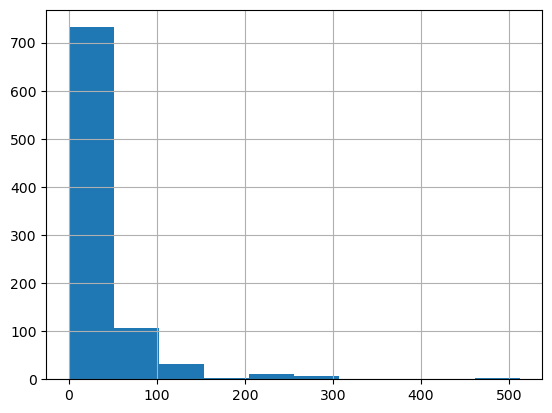

In [9]:
df['Fare'].hist()

In [10]:
df['LogFare'] = np.log(df['Fare']+1)

<AxesSubplot: >

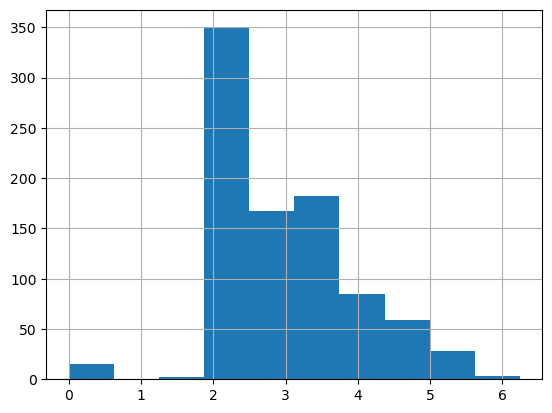

In [11]:
df['LogFare'].hist()

In [12]:
pclasses = sorted(df['Pclass'].unique())
pclasses

[1, 2, 3]

In [13]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [14]:
df = pd.get_dummies(df, columns=['Sex', 'Pclass', 'Embarked'])

In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [16]:
added_columns = ['Sex_male', 'Sex_female',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
df[added_columns].head()

,Sex_male,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0,0,1,0,0,1
1,0,1,1,0,0,1,0,0
2,0,1,0,0,1,0,0,1
3,0,1,1,0,0,0,0,1
4,1,0,0,0,1,0,0,1


In [17]:
from torch import tensor

In [18]:
t_dep = tensor(df.Survived)

In [19]:
indep_cols = ['Age', 'SibSp', 'Parch', 'LogFare'] + added_columns

In [20]:
t_indep = tensor(df[indep_cols].values, dtype=torch.float)

In [21]:
t_indep.shape

torch.Size([891, 12])

In [22]:
t_indep

tensor([[22.0000,  1.0000,  0.0000,  2.1102,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [38.0000,  1.0000,  0.0000,  4.2806,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000],
        [26.0000,  0.0000,  0.0000,  2.1889,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  1.0000,  0.0000,  3.9908,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  0.0000,  0.0000,  2.2028,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [24.0000,  0.0000,  0.0000,  2.2469,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000],
        [54.0000,  0.0000,  0.0000,  3.9677,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        ...,
        [25.0000,  0.0000,  0.0000,  2.0857,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [39.0000,  0.0000,  5.0000,  3.4054

In [23]:
torch.manual_seed(442)

n_coeff = t_indep.shape[1]

coeffs = torch.rand(n_coeff) - 0.5

coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625])

In [24]:
t_indep

tensor([[22.0000,  1.0000,  0.0000,  2.1102,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [38.0000,  1.0000,  0.0000,  4.2806,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000],
        [26.0000,  0.0000,  0.0000,  2.1889,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  1.0000,  0.0000,  3.9908,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  0.0000,  0.0000,  2.2028,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [24.0000,  0.0000,  0.0000,  2.2469,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000],
        [54.0000,  0.0000,  0.0000,  3.9677,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        ...,
        [25.0000,  0.0000,  0.0000,  2.0857,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [39.0000,  0.0000,  5.0000,  3.4054

In [25]:
vals, indices = t_indep.max(dim=0)
t_indep = t_indep / vals

In [26]:
t_indep*coeffs

tensor([[-0.1273,  0.0173,  0.0000, -0.0765, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2199,  0.0173,  0.0000, -0.1551, -0.0000, -0.3147,  0.4876,  0.0000,  0.0000, -0.4392,  0.0000,  0.0000],
        [-0.1504,  0.0000,  0.0000, -0.0793, -0.0000, -0.3147,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0173,  0.0000, -0.1446, -0.0000, -0.3147,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0000,  0.0000, -0.0798, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.1389,  0.0000,  0.0000, -0.0814, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.2103,  0.0000],
        [-0.3125,  0.0000,  0.0000, -0.1438, -0.2632, -0.0000,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        ...,
        [-0.1447,  0.0000,  0.0000, -0.0756, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2257,  0.0000,  0.2008, -0.1234

In [27]:
preds = (t_indep*coeffs).sum(axis=1)

In [28]:
preds[:10]

tensor([ 0.1927, -0.6239,  0.0979,  0.2056,  0.0968,  0.0066,  0.1306,  0.3476,  0.1613, -0.6285])

In [29]:
# Loss in first step
loss = torch.abs(preds-t_dep).mean()
loss

tensor(0.5382)

In [30]:
def calc_preds(coeffs, indep): return (indep*coeffs).sum(axis=1)

In [31]:
def calc_loss(coeffs, indep, t_dep): return torch.abs(calc_preds(coeffs,indep)-t_dep).mean()

# Doing one gradient descent step

In [32]:
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625], requires_grad=True)

In [33]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(0.5382, grad_fn=<MeanBackward0>)

In [34]:
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    coeffs.grad.zero_()
    print(calc_loss(coeffs, t_indep, t_dep))
    

tensor(0.5197)


# Training the linear Model

In [35]:
from fastai.data.transforms import RandomSplitter

In [36]:
trn_split, val_split = RandomSplitter(seed=42)(df)

In [37]:
val_split

(#178) [303,778,531,385,134,476,691,443,386,128...]

In [38]:
training_independent, validation_independent = t_indep[trn_split], t_indep[val_split]
training_dependent, validation_dependent = t_dep[trn_split], t_dep[val_split]
len(training_independent), len(validation_independent), len(training_dependent), len(validation_dependent)

(713, 178, 713, 178)

In [39]:
def update_coeffs(coeffs, lr): coeffs.sub_(coeffs.grad * lr)

In [40]:
def one_epoch(coeffs, lr, t_indep, t_dep):
    loss = calc_loss(coeffs, t_indep, t_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")

In [41]:
def init_coeff(n_coeff): return (torch.rand(n_coeff)-0.5).requires_grad_()

In [42]:
def train_model(t_indep, t_dep, epochs=30, lr=0.01 ):
    torch.manual_seed(442)
    coeffs = init_coeff(n_coeff=t_indep.shape[1])
    for i in range(epochs):
         one_epoch(coeffs=coeffs, lr=lr, t_indep=t_indep, t_dep=t_dep)
    return coeffs

In [43]:
coeffs = train_model(t_indep, t_dep, epochs=18, lr=0.02)

0.538; 0.534; 0.527; 0.517; 0.504; 0.491; 0.480; 0.468; 0.450; 0.424; 0.398; 0.376; 0.356; 0.338; 0.320; 0.304; 0.292; 0.293; 

In [44]:
def show_coeffs(): return dict(zip(indep_cols, coeffs.requires_grad_(False)))
show_coeffs()

{'Age': tensor(-0.2323),
 'SibSp': tensor(0.0999),
 'Parch': tensor(0.2523),
 'LogFare': tensor(0.1044),
 'Sex_male': tensor(-0.4257),
 'Sex_female': tensor(0.3447),
 'Pclass_1': tensor(0.8585),
 'Pclass_2': tensor(0.4427),
 'Pclass_3': tensor(0.2769),
 'Embarked_C': tensor(0.1696),
 'Embarked_Q': tensor(0.3352),
 'Embarked_S': tensor(0.1258)}

# Measuring Accuracy

In [45]:
preds = calc_preds(coeffs, validation_independent)

In [46]:
result = validation_dependent.bool() == (preds>0.5)

In [47]:
result[:16]

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True, False, False, False,  True,  True, False])

In [48]:
result.float()

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.])

In [49]:
def accuracy(coeffs, val_dep, val_indep): return (val_dep.bool() == (calc_preds(coeffs, val_indep)>0.5)).float().mean()

In [50]:
accuracy(coeffs=coeffs, val_dep=validation_dependent, val_indep=validation_independent)

tensor(0.7921)

# Using Sigmoid

In [51]:
import sympy

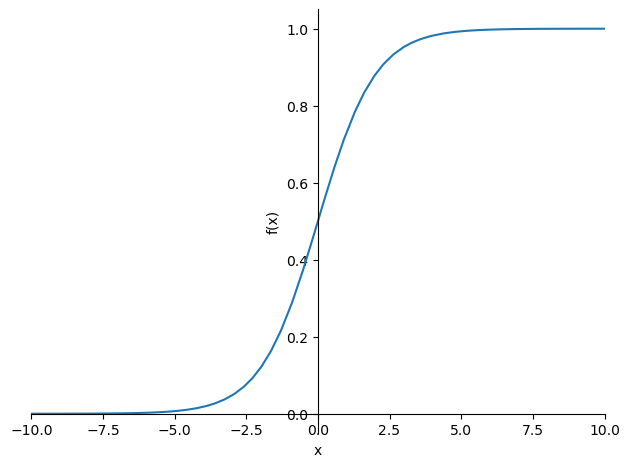

In [52]:
sympy.plot("1/(1+exp(-x))", xlim=(-10,10))

In [53]:
def calc_preds(coeffs, indep): return torch.sigmoid((indep*coeffs).sum(axis=1))

In [54]:
coeffs = train_model(t_indep, t_dep, epochs=30, lr=10)

0.511; 0.352; 0.286; 0.237; 0.209; 0.202; 0.201; 0.202; 0.202; 0.201; 0.199; 0.196; 0.193; 0.191; 0.189; 0.189; 0.189; 0.189; 0.189; 0.189; 0.189; 0.189; 0.189; 0.189; 0.189; 0.189; 0.189; 0.189; 0.189; 0.189; 

In [55]:
accuracy(coeffs=coeffs, val_dep=validation_dependent, val_indep=validation_independent)

tensor(0.8258)

In [56]:
show_coeffs()

{'Age': tensor(-3.6124),
 'SibSp': tensor(-5.1099),
 'Parch': tensor(-2.4047),
 'LogFare': tensor(3.3440),
 'Sex_male': tensor(-44.0864),
 'Sex_female': tensor(37.1375),
 'Pclass_1': tensor(18.5334),
 'Pclass_2': tensor(10.6545),
 'Pclass_3': tensor(-34.4777),
 'Embarked_C': tensor(9.1363),
 'Embarked_Q': tensor(3.6720),
 'Embarked_S': tensor(-19.0456)}

# Final Result

In [109]:
test_df = pd.read_csv(path/'test.csv')

In [110]:
test_df['Fare'] = test_df.Fare.fillna(0)

In [111]:
test_df.fillna(modes, inplace=True)

In [112]:
test_df['LogFare'] = np.log(test_df['Fare']+1)

In [113]:
test_df = pd.get_dummies(test_df, columns=["Sex", "Pclass", "Embarked"])

In [114]:
test_indep = tensor(test_df[indep_cols].values, dtype=torch.float)

In [115]:
test_indep = test_indep / vals

In [124]:
test_df['Survived'] = (calc_preds(coeffs, test_indep)>0.5).int()

In [125]:
sub_df = test_df[['PassengerId', 'Survived']]

In [126]:
sub_df.to_csv('Submit.csv', index=False)

In [127]:
!head Submit.csv

PassengerId,Survived
892,0
893,0
894,0
895,0
896,0
897,0
898,0
899,0
900,1


# Using Matrix Multiplication

In [68]:
(validation_independent * coeffs).sum(axis=1)

tensor([  51.7689,  -74.8143,  -69.3822,  -50.9805,  -52.1924,  -52.9953,   12.6445,   28.8961,  -99.5770,   11.3612,  -97.8819,  -70.0573,
         -97.4925,    6.4182,  -98.0657,  -44.8539,  -45.7570,   28.9827,  -52.4726,  -16.5691,  -97.5224,  -45.3506,   64.5343,   27.3835,
         -97.3953,  -74.8866,  -16.1331,  -45.6215,  -97.1620,    6.4104,   28.5461,  -19.0304,  -97.2966,  -97.8067,   51.4980,  -17.9710,
         -44.8156,   66.0022,  -97.5132,  -16.9806,  -52.0268,  -97.5132,  -53.1613,   65.6918,  -97.3325,  -18.2553,  -96.6128,  -98.0320,
         -74.8649,  -16.2485,  -22.7283,  -99.9382,  -99.5092,  -97.6211,  -52.3429,  -52.6138,  -74.8136,  -98.3703,  -97.3777,  -97.3754,
         -15.9717,  -97.8983,  -46.3711,  -97.3851,   27.8868,  -43.6113,  -52.1472,  -97.6428,  -76.2357,   28.1473,  -97.6127,   11.4046,
         -52.5687,  -97.4335,  -43.9179,  -97.1685,  -97.5132,  -44.5363,  -51.9214,  -53.1142,  -52.2244,   64.7663,  -97.4772,  -97.5628,
          27.7973,  

In [69]:
coeffs

tensor([ -3.6124,  -5.1099,  -2.4047,   3.3440, -44.0864,  37.1375,  18.5334,  10.6545, -34.4777,   9.1363,   3.6720, -19.0456])

In [70]:
validation_independent@coeffs

tensor([  51.7689,  -74.8143,  -69.3822,  -50.9805,  -52.1924,  -52.9953,   12.6445,   28.8961,  -99.5770,   11.3612,  -97.8819,  -70.0573,
         -97.4925,    6.4182,  -98.0657,  -44.8539,  -45.7570,   28.9827,  -52.4726,  -16.5691,  -97.5224,  -45.3506,   64.5343,   27.3836,
         -97.3953,  -74.8866,  -16.1331,  -45.6215,  -97.1620,    6.4104,   28.5461,  -19.0304,  -97.2966,  -97.8067,   51.4980,  -17.9710,
         -44.8156,   66.0022,  -97.5132,  -16.9806,  -52.0268,  -97.5132,  -53.1613,   65.6918,  -97.3326,  -18.2553,  -96.6128,  -98.0320,
         -74.8649,  -16.2485,  -22.7283,  -99.9382,  -99.5092,  -97.6211,  -52.3429,  -52.6138,  -74.8136,  -98.3703,  -97.3777,  -97.3754,
         -15.9717,  -97.8983,  -46.3711,  -97.3852,   27.8868,  -43.6113,  -52.1472,  -97.6428,  -76.2357,   28.1473,  -97.6127,   11.4046,
         -52.5687,  -97.4335,  -43.9179,  -97.1685,  -97.5132,  -44.5363,  -51.9214,  -53.1142,  -52.2244,   64.7663,  -97.4772,  -97.5628,
          27.7973,  

In [71]:
def calc_preds(coeffs, indep): return torch.sigmoid(indep@coeffs)

In [72]:
def init_coeff(n_coeff): return (torch.rand(n_coeff, 1)*0.1).requires_grad_()
# def init_coeffs(n_coeff): return (torch.rand(n_coeff, 1)*0.1).requires_grad_()

In [73]:
# def init_coeff(n_coeff): return (torch.rand(n_coeff,1)-0.5).requires_grad_()

In [74]:
trn_dep = training_dependent[:, None]
val_dep = validation_dependent[:, None]

In [75]:
coeffs = train_model(lr=100, t_indep=training_independent, t_dep=trn_dep)

0.512; 0.323; 0.323; 0.315; 0.276; 0.262; 0.222; 0.215; 0.214; 0.214; 0.213; 0.211; 0.209; 0.208; 0.208; 0.208; 0.208; 0.208; 0.208; 0.207; 0.207; 0.206; 0.204; 0.197; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 

In [76]:
accuracy(coeffs=coeffs, val_indep=validation_independent, val_dep=val_dep)

tensor(0.8258)

In [77]:
coeffs.shape

torch.Size([12, 1])

# Neural network

In [78]:
init_coeff??

Signature: init_coeff(n_coeff)
Docstring: <no docstring>
Source:    def init_coeff(n_coeff): return (torch.rand(n_coeff, 1)*0.1).requires_grad_()
File:      /var/folders/c3/pmnhjglx38j8dfn82nz6zl7r0000gn/T/ipykernel_14851/3726120029.py
Type:      function


In [95]:
def init_coeff(n_coeff, n_hidden=100):
    layer1 = (torch.rand(n_coeff, n_hidden)*0.1)/n_hidden
    layer2 = torch.rand(n_hidden, 1) - 0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(), layer2.requires_grad_(), const.requires_grad_()

In [80]:
import torch.nn.functional as F

In [81]:
calc_preds??

Signature: calc_preds(coeffs, indep)
Docstring: <no docstring>
Source:    def calc_preds(coeffs, indep): return torch.sigmoid(indep@coeffs)
File:      /var/folders/c3/pmnhjglx38j8dfn82nz6zl7r0000gn/T/ipykernel_14851/1574366332.py
Type:      function


In [82]:
def calc_preds(coeffs, indep):
    l1, l2, const = coeffs
    res = F.relu(indep@l1)
    res = res@l2 + const
    return torch.sigmoid(res)

In [83]:
update_coeffs??

Signature: update_coeffs(coeffs, lr)
Docstring: <no docstring>
Source:    def update_coeffs(coeffs, lr): coeffs.sub_(coeffs.grad * lr)
File:      /var/folders/c3/pmnhjglx38j8dfn82nz6zl7r0000gn/T/ipykernel_14851/1244173057.py
Type:      function


In [84]:
def update_coeffs(coeffs, lr):
    for layer in coeffs:
        layer.sub_(layer.grad*lr)
        layer.grad.zero_()

In [107]:
coeffs = train_model(lr=20, t_indep=training_independent, t_dep=trn_dep, epochs=1000)

0.547; 0.298; 0.273; 0.248; 0.232; 0.227; 0.235; 0.226; 0.214; 0.207; 0.204; 0.202; 0.201; 0.200; 0.200; 0.199; 0.198; 0.198; 0.197; 0.197; 0.197; 0.196; 0.196; 0.196; 0.196; 0.196; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.192; 0.192; 0.192;

In [108]:
accuracy(coeffs, val_dep=val_dep, val_indep=validation_independent)

tensor(0.8427)

In [123]:
coeffs[2]


tensor(7.8255, requires_grad=True)